# КТ 1. Практическая часть 

Целевая переменная - price_doc

Задача: добиться наилучшего значения метрики MSE.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV
import statsmodels.api as sm

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,sub_area,area_m,...,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000,price_doc
0,38,18.0,1.0,14.0,panel,1971.0,1.0,9.0,Dmitrovskoe,7.126815e+06,...,27.084184,2.257015,2.442781,14.856442,17.16,10.33,2,4,0,5150000
1,41,17.0,14.0,16.0,panel,1978.0,1.0,10.0,Savelovskoe,2.641243e+06,...,13.719174,1.143264,11.528984,5.323699,0.90,39.48,17,3,0,5980000
2,41,20.0,11.0,14.0,panel,1989.0,1.0,8.0,Krjukovo,1.084231e+07,...,276.453594,23.037800,20.828299,38.988909,7.54,6.64,0,2,0,4600000
3,38,19.0,6.0,17.0,panel,1986.0,1.0,8.0,Brateevo,7.587523e+06,...,14.085660,1.173805,2.885041,14.921056,24.97,0.00,0,5,0,5650000
4,58,37.0,3.0,9.0,panel,1968.0,3.0,6.0,Novogireevo,4.395333e+06,...,5.455795,0.454650,1.920884,11.812614,3.46,5.41,0,4,4,9300000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8894 entries, 0 to 8893
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   full_sq             8894 non-null   int64  
 1   life_sq             8894 non-null   float64
 2   floor               8894 non-null   float64
 3   max_floor           8894 non-null   float64
 4   material            8894 non-null   object 
 5   build_year          8859 non-null   float64
 6   num_room            8894 non-null   float64
 7   kitch_sq            8894 non-null   float64
 8   sub_area            8894 non-null   object 
 9   area_m              8894 non-null   float64
 10  green_zone_part     8894 non-null   float64
 11  indust_part         8894 non-null   float64
 12  preschool           8894 non-null   int64  
 13  school              8894 non-null   int64  
 14  healthcare          8894 non-null   int64  
 15  shopping            8894 non-null   int64  
 16  office

In [4]:
missing_values = df.isnull().sum()
missing_values[missing_values != 0] / df.shape[0] * 100

build_year        0.393524
metro_min_walk    0.123679
metro_km_walk     0.123679
dtype: float64

In [5]:
# В нашем распоряжении почти 9 тысяч строк, процент пропусков по столбцам меньше 0,5
# Можем удалить эти строки, чтобы не мучиться с заполнением (это того не стоит в данном случае)
df = df.dropna()

In [6]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].unique()}")

material: ['panel' 'breezeblock' 'brick' 'mass concrete plus brick' 'mass concrete']
sub_area: ['Dmitrovskoe' 'Savelovskoe' 'Krjukovo' 'Brateevo' 'Novogireevo'
 'Horoshevo-Mnevniki' 'Rostokino' 'Veshnjaki' "Chertanovo Central'noe"
 'Poselenie Voskresenskoe' 'Ivanovskoe' "Mar'ina Roshha" 'Otradnoe'
 'Danilovskoe' 'Begovoe' 'Zjablikovo' 'Birjulevo Vostochnoe' 'Kuncevo'
 'Ochakovo-Matveevskoe' 'Nagornoe' 'Akademicheskoe' 'Izmajlovo'
 'Jakimanka' 'Ramenki' "Mar'ino" 'Beskudnikovskoe' 'Zjuzino'
 "Zamoskvorech'e" 'Caricyno' 'Hovrino' 'Lefortovo' 'Koptevo'
 'Juzhnoe Medvedkovo' 'Presnenskoe' 'Teplyj Stan' "Gol'janovo" "Kuz'minki"
 'Bogorodskoe' 'Novo-Peredelkino' 'Vostochnoe Degunino' 'Butyrskoe'
 'Sviblovo' 'Kosino-Uhtomskoe' 'Severnoe Tushino' "Krasnosel'skoe"
 'Birjulevo Zapadnoe' 'Savelki' 'Donskoe' 'Juzhnoe Butovo'
 'Orehovo-Borisovo Juzhnoe' 'Severnoe Izmajlovo' 'Severnoe Medvedkovo'
 'Zapadnoe Degunino' 'Kotlovka' 'Kapotnja' 'Solncevo' 'Bibirevo'
 'Dorogomilovo' 'Mozhajskoe' 'Losinoost

In [7]:
# Переводим все категориальные переменные в числовой формат
label_encoder = LabelEncoder()
df['sub_area'] = label_encoder.fit_transform(df['sub_area'])
df['material'] = label_encoder.fit_transform(df['material'])
df[['radiation', 'detention']] = df[['radiation', 'detention']].replace({"yes": 1, "no": 0})

### Baseline для задачи

In [8]:
X = df.drop(["price_doc"], axis=1)
y = df[["price_doc"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(train_X, train_y)

print(f'R^2_train = {reg.score(train_X, train_y)}')
print(f'R^2_test = {reg.score(test_X, test_y)}')
print(f'MSE_train = {mean_squared_error(reg.predict(train_X), train_y)}')
print(f'MSE_test = {mean_squared_error(reg.predict(test_X), test_y)}')

R^2_train = 0.5531229859440076
R^2_test = 0.5722074911952084
MSE_train = 10923547989071.176
MSE_test = 11543810601771.4


In [9]:
# Посмотрим корреляцию 

<Axes: >

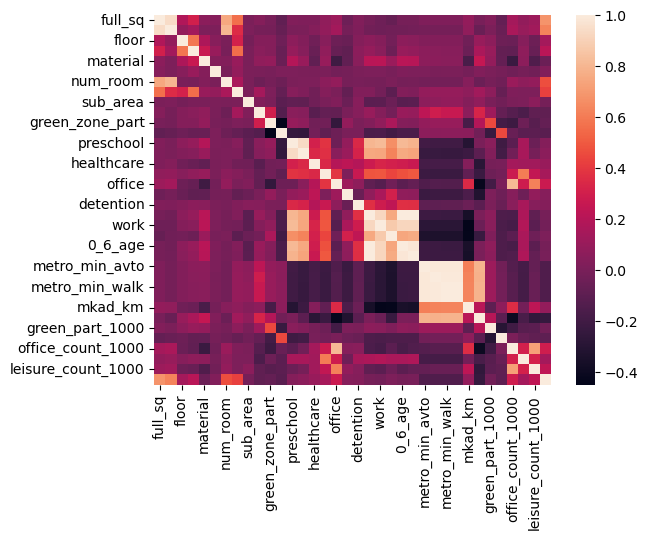

In [10]:
correlation = df.corr()
sns.heatmap(correlation)

In [11]:
correlation['price_doc']

full_sq               0.681022
life_sq               0.623202
floor                 0.144934
max_floor             0.209632
material             -0.046533
build_year            0.022471
num_room              0.464164
kitch_sq              0.427722
sub_area             -0.015190
area_m               -0.091099
green_zone_part      -0.073498
indust_part          -0.110676
preschool             0.036880
school                0.060364
healthcare            0.101514
shopping              0.147167
office                0.271687
radiation             0.038867
detention             0.037800
young                -0.008290
work                 -0.021680
elder                 0.013703
0_6_age              -0.011499
7_14_age             -0.003786
metro_min_avto       -0.145305
metro_km_avto        -0.144093
metro_min_walk       -0.144393
metro_km_walk        -0.144393
mkad_km               0.088118
kremlin_km           -0.242776
green_part_1000      -0.028546
prom_part_1000       -0.095354
office_c

In [12]:
# есть вероятность наличия мультиколлинеарности - среди признаков есть те, что влияют друг на друга больше, чем на результат 

<Axes: >

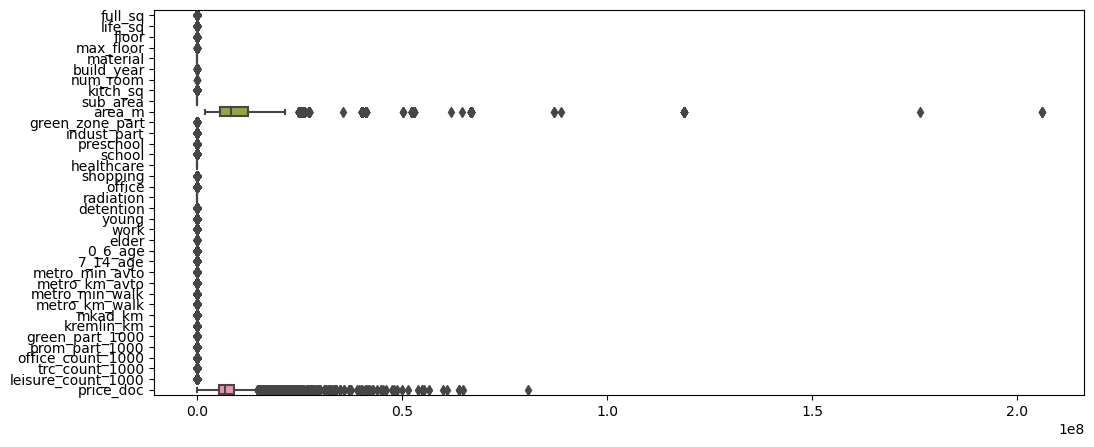

In [13]:
plt.figure(figsize = (12,5))
sns.boxplot(data = df, orient = "h")

Размерность до удаления выбросов: (8848, 36)
Размерность после удаления выбросов: (7699, 36)


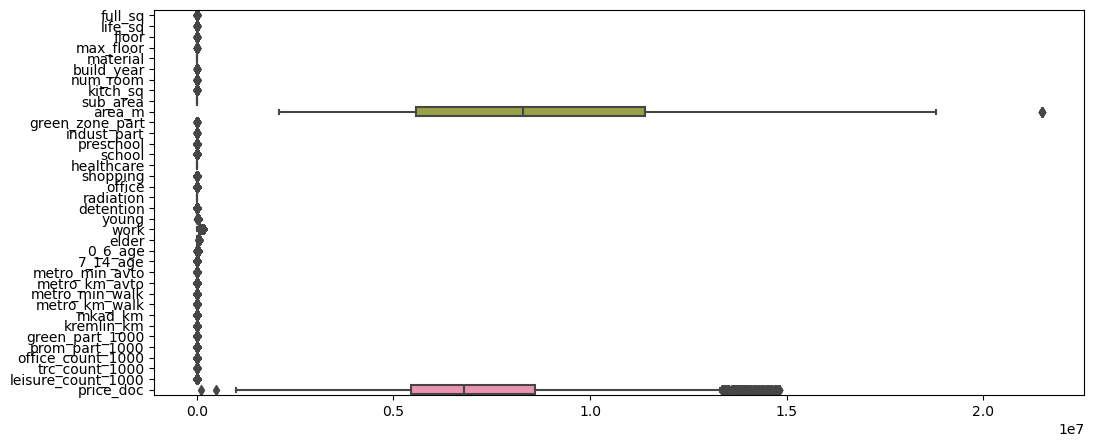

In [14]:
print(f"Размерность до удаления выбросов: {df.shape}")

outliers_in_columns = ['price_doc', 'area_m']

for column in outliers_in_columns: 
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


plt.figure(figsize = (12,5))
sns.boxplot(data = df, orient = "h")
print(f"Размерность после удаления выбросов: {df.shape}")

In [31]:
X = df.drop(["price_doc"], axis=1)
y = df[["price_doc"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler() # определим параметр scaler для стандартизации

train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [32]:
# Модель 1 - без стандартизации 

reg = LinearRegression().fit(train_X, train_y)

print(f'R^2_train = {reg.score(train_X, train_y)}')
print(f'R^2_test = {reg.score(test_X, test_y)}')
print(f'MSE_train = {mean_squared_error(reg.predict(train_X), train_y)}')
print(f'MSE_test = {mean_squared_error(reg.predict(test_X), test_y)}')

R^2_train = 0.32671831956403663
R^2_test = 0.3422382750031403
MSE_train = 6204437044626.429
MSE_test = 6050857660074.661


In [33]:
# Модель 2 - с стандартизацией (т.к. некоторые значения сильно отличаются от остальных )

reg = LinearRegression().fit(train_X_scaled, train_y)
train_pred = reg.predict(train_X_scaled)
test_pred = reg.predict(test_X_scaled)

print(f'R^2_train = {reg.score(train_X_scaled, train_y)}')
print(f'R^2_test = {reg.score(test_X_scaled, test_y)}')
print(f'MSE_train = {mean_squared_error(train_y, train_pred)}')
print(f'MSE_test = {mean_squared_error(test_y, test_pred)}')

R^2_train = 0.3269540941753032
R^2_test = 0.34180061246700244
MSE_train = 6202264330330.42
MSE_test = 6054883789307.599


In [34]:
# Т.к было подозрение на мультиколлинеарность, попробуем регляризацию 

# Модель 3 - Ridge с стандартизацией
ridge_reg = Ridge(alpha=1.0)  
ridge_reg.fit(train_X_scaled, train_y)

train_pred = ridge_reg.predict(train_X_scaled)
test_pred = ridge_reg.predict(test_X_scaled)

print(f'R^2_train = {ridge_reg.score(train_X_scaled, train_y)}')
print(f'R^2_test = {ridge_reg.score(test_X_scaled, test_y)}')
print(f'MSE_train = {mean_squared_error(train_y, train_pred)}')
print(f'MSE_test = {mean_squared_error(test_y, test_pred)}')

R^2_train = 0.3266314218653923
R^2_test = 0.34252691916694333
MSE_train = 6205237825809.444
MSE_test = 6048202375215.099


In [35]:
# Модель 4 - Lasso  с стандартизацией
lasso_reg = Lasso(alpha=0.1)  
lasso_reg.fit(train_X_scaled, train_y)


train_pred = lasso_reg.predict(train_X_scaled)
test_pred = lasso_reg.predict(test_X_scaled)

# Оценка модели
print(f'R^2_train = {lasso_reg.score(train_X_scaled, train_y)}')
print(f'R^2_test = {lasso_reg.score(test_X_scaled, test_y)}')
print(f'MSE_train = {mean_squared_error(train_y, train_pred)}')
print(f'MSE_test = {mean_squared_error(test_y, test_pred)}')

R^2_train = 0.32660650494974064
R^2_test = 0.3425650725710906
MSE_train = 6205467440603.667
MSE_test = 6047851395811.815


C:\Users\Honor\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.910e+16, tolerance: 5.676e+12
  model = cd_fast.enet_coordinate_descent(


In [ ]:
Наилучший результат для Lasso со стандартизацией 